In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Coloring_H0_Uf50_P05_Tries1_Flips10000.csv
# Coloring_H2_Uf50_P05_Tries100_Flips10000.csv
# Walksat_First100_Uf50_P05_Tries100_Flips10000.csv
# Coloring_H0_Uf100_P05_Tries100_Flips10000.csv
algorithm = "Coloring_H0_Uf50_P05_Tries100_Flips10000" 
df = pd.read_csv('Coloring_H0_Uf50_P05_Tries100_Flips10000.csv', na_values=['', 'NA', 'N/A'])

algorithm2 = "Coloring_H2_Uf50_P05_Tries100_Flips10000"
df2 = pd.read_csv('Coloring_H2_Uf50_P05_Tries100_Flips10000.csv', na_values=['', 'NA', 'N/A'])

algorithm3 = "Walksat_First100_Uf50_P05_Tries100_Flips10000"
df3 = pd.read_csv('Walksat_First100_Uf50_P05_Tries100_Flips10000.csv', na_values=['', 'NA', 'N/A'])

algorithm4 = "Coloring_H4_First100_Uf50_P05_Tries100_Flips10000"
df4 = pd.read_csv('Coloring_H4_First100_Uf50_P05_Tries100_Flips10000.csv', na_values=['', 'NA', 'N/A'])

headers = ['problem_name', 'time_to_solution', 'noise_param', 'tries', 'flips',
                'order_of_colors', 'order_of_parallel_flips']

In [37]:
replica = "replica2025Feb25Results"
df5 = pd.read_csv('replica2025Feb25Results.csv', na_values=['', 'NA', 'N/A'])
print(df5.head())
print(df5.info())

   run_id problem_name  time_to_solution  noise_param  tries  iterations  \
0       1   uf5004.cnf          0.200671          0.5      0         915   
1       2   uf5004.cnf          0.048712          0.5      0         183   
2       3   uf5004.cnf          0.029539          0.5      0         129   
3       4   uf5004.cnf          0.023644          0.5      0         116   
4       5   uf5004.cnf          0.041023          0.5      0         188   

   flips  order_of_colors  order_of_parallel_flips  
0    915              NaN                      NaN  
1    183              NaN                      NaN  
2    129              NaN                      NaN  
3    116              NaN                      NaN  
4    188              NaN                      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   run_id   

In [3]:
print(df.head())
print(df.info())

   run_id problem_name  time_to_solution  noise_param  tries  iterations  \
0       1   uf5001.cnf          9.568410          0.5    0.0       284.0   
1       1   uf5002.cnf               NaN          NaN    NaN         NaN   
2       1   uf5003.cnf          2.907980          0.5    0.0        43.0   
3       1   uf5004.cnf         30.472374          0.5    0.0      1235.0   
4       1   uf5005.cnf          1.222945          0.5    0.0        11.0   

    flips                                    order_of_colors  \
0   457.0  [4, 7, 6, 6, 7, 0, 5, 1, 1, 1, 0, 2, 2, 0, 7, ...   
1     NaN                                                NaN   
2   101.0  [0, 7, 5, 1, 3, 2, 6, 1, 4, 2, 6, 10, 5, 3, 5,...   
3  1715.0  [4, 8, 5, 3, 3, 1, 4, 1, 4, 4, 7, 1, 2, 9, 3, ...   
4    33.0                  [3, 5, 4, 1, 0, 8, 3, 7, 4, 7, 8]   

                             order_of_parallel_flips  
0  [5, 6, 7, 4, 3, 4, 2, 3, 3, 2, 3, 3, 2, 3, 2, ...  
1                                               

In [4]:
# Now what to plot:

# a Run length distribution
# b Success rate - modify below code with tinish def
# c Instance-wise flips to solution (done; just a number)
# d Batch wise flips to solution (done) - modify below code
# e Color choice distribution for the batch - take the per-instance and do for batch (most common)
# f Color choice during solving per instance (done above)
# g Color choice domain plots with instance-wise flips to solution range (combine e and c)
# h Parallelism % domain heuristic plots with instance-wise flips to solution range (needs new)

In [5]:
# Sanity check: did we actually attempt 100 problems 100 times
problem_counts = df['problem_name'].value_counts()
print([i for i in problem_counts if i != 100])

[]


In [6]:
df.loc[[1], ['problem_name','flips']]

,problem_name,flips
1,uf5002.cnf,NaN


In [7]:
min_flips = df.groupby('problem_name')['iterations'].mean().reset_index() # ('problem_name')('flips')
min_flips_sorted = min_flips.sort_values(by='problem_name', ascending=True).reset_index(drop=True)

In [8]:
print(min_flips_sorted)

    problem_name   iterations
0     uf5001.cnf  2333.706522
1    uf50010.cnf   557.370000
2   uf500100.cnf  2916.178082
3    uf50011.cnf  1451.414141
4    uf50012.cnf  3306.156627
..           ...          ...
95   uf50095.cnf  2387.734043
96   uf50096.cnf   128.160000
97   uf50097.cnf   503.950000
98   uf50098.cnf   755.590000
99   uf50099.cnf   532.480000

[100 rows x 2 columns]


In [10]:
min_flips = df3.groupby('problem_name')['flips'].max().reset_index()
print(min_flips.max())

problem_name    uf50099.cnf
flips                9975.0
dtype: object


In [11]:
# For RLD Distribution need to do the following
# Cumulative run length distribution
# x axis goes from 0 flips from 
# and margin goes from 0 to maxflips
# so basically, plot percentage of problems which are solved 
# given you allow for increasing values of max(flips)

headers = ['problem_name', 'time_to_solution', 'noise_param', 'tries', 'iterations', 'flips',
                'order_of_colors', 'order_of_parallel_flips']
choice_to_plot = 4
max_to_fill = 110000
# for FLIPS 20k
# before, 10k , now 110k
# New: let's plot the mean (Jan 27 2025)
# New: (Feb 6 2025) let's fill in the NaNs with the appropiate MAX-Value
min_flips = df.groupby('problem_name')[headers[choice_to_plot]]
min_flips.fillna(110000) 
min_flips = min_flips.mean().reset_index() # .min()
min_flips.rename(columns={headers[choice_to_plot]: 'min_flips'}, inplace=True)


min_flips2 = df2.groupby('problem_name')[headers[choice_to_plot]]
min_flips2.fillna(110000) 
min_flips2 = min_flips2.mean().reset_index()
min_flips2.rename(columns={headers[choice_to_plot]: 'min_flips'}, inplace=True)

min_flips3 = df3.groupby('problem_name')[headers[choice_to_plot]]
min_flips3.fillna(10000) 
min_flips3 = min_flips3.mean().reset_index()
min_flips3.rename(columns={headers[choice_to_plot]: 'min_flips'}, inplace=True)

min_flips4 = df4.groupby('problem_name')[headers[choice_to_plot]]
min_flips4.fillna(110000) 
min_flips4 = min_flips4.mean().reset_index()
min_flips4.rename(columns={headers[choice_to_plot]: 'min_flips'}, inplace=True)

/tmp/ipykernel_3835900/2515726572.py:17: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  min_flips.fillna(110000)
/tmp/ipykernel_3835900/2515726572.py:23: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  min_flips2.fillna(110000)
/tmp/ipykernel_3835900/2515726572.py:28: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  min_flips3.fillna(10000)
/tmp/ipykernel_3835900/2515726572.py:33: FutureWarning: SeriesGroupBy.fillna is deprecated and will be re

In [12]:
import re
# regex pattern to jank the problem number to numerically sort the pandas dataframe
# since the way they handle string sorting gives me the ick
def extract_number(problem_name):
    match = re.search(r'uf(\d+)\.cnf', problem_name)
    if match:
        return int(match.group(1))
    else:
        return None
   
min_flips['problem_number'] = min_flips['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
min_flips_sorted = min_flips.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100 = min_flips_sorted.head(100)

min_flips2['problem_number'] = min_flips2['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
min_flips_sorted2 = min_flips2.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100_2 = min_flips_sorted2.head(100)

min_flips3['problem_number'] = min_flips3['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
min_flips_sorted3 = min_flips3.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100_3 = min_flips_sorted3.head(100)

min_flips4['problem_number'] = min_flips4['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
min_flips_sorted4 = min_flips4.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100_4 = min_flips_sorted4.head(100)

In [13]:
# Determine the range for the x-axis
max_flips = int(plotting_first100['min_flips'].max())
flip_range = np.arange(0, max_flips + 1)

max_flips2 = int(plotting_first100_2['min_flips'].max())
flip_range2 = np.arange(0, max_flips2 + 1)

max_flips3 = int(plotting_first100_3['min_flips'].max()) + 1
flip_range3 = np.arange(0, max_flips3 + 1)

max_flips4 = int(plotting_first100_4['min_flips'].max()) + 1
flip_range4 = np.arange(0, max_flips4 + 1)

# Initialize a list to store cumulative percentages

cumulative_percentages = []
cumulative_percentages2 = []
cumulative_percentages3 = []
cumulative_percentages4 = []


# Total number of solved problems

total_problems = len(plotting_first100)
total_problems2 = len(plotting_first100_2)
total_problems3 = len(plotting_first100_3)
total_problems4 = len(plotting_first100_4)

for flips in flip_range:
    # Number of problems with mean_flips <= current flips
    solved = plotting_first100[plotting_first100['min_flips'] <= flips].shape[0]
    # Calculate percentage
    percentage = (solved / total_problems) * 100
    cumulative_percentages.append(percentage)

# Create a DataFrame for plotting
cumulative_df = pd.DataFrame({
    'Max Flips': flip_range,
    'Cumulative Percentage Solved': cumulative_percentages
})

for flips in flip_range2:
    # Number of problems with mean_flips <= current flips
    solved = plotting_first100_2[plotting_first100_2['min_flips'] <= flips].shape[0]
    # Calculate percentage
    percentage = solved#(solved / total_problems2) * 100
    cumulative_percentages2.append(percentage)

# Create a DataFrame for plotting
cumulative_df2 = pd.DataFrame({
    'Max Flips': flip_range2,
    'Cumulative Percentage Solved': cumulative_percentages2
})

# 3
for flips in flip_range3:
    # Number of problems with mean_flips <= current flips
    solved = plotting_first100_3[plotting_first100_3['min_flips'] <= flips].shape[0]
    # Calculate percentage
    percentage = (solved / total_problems3) * 100
    cumulative_percentages3.append(percentage)

# Create a DataFrame for plotting
cumulative_df3 = pd.DataFrame({
    'Max Flips': flip_range3,
    'Cumulative Percentage Solved': cumulative_percentages3
})
# 4

for flips in flip_range4:
    # Number of problems with mean_flips <= current flips
    solved = plotting_first100_4[plotting_first100_4['min_flips'] <= flips].shape[0]
    # Calculate percentage
    percentage = (solved / total_problems4) * 100
    cumulative_percentages4.append(percentage)

# Create a DataFrame for plotting
cumulative_df4 = pd.DataFrame({
    'Max Flips': flip_range4,
    'Cumulative Percentage Solved': cumulative_percentages4
})


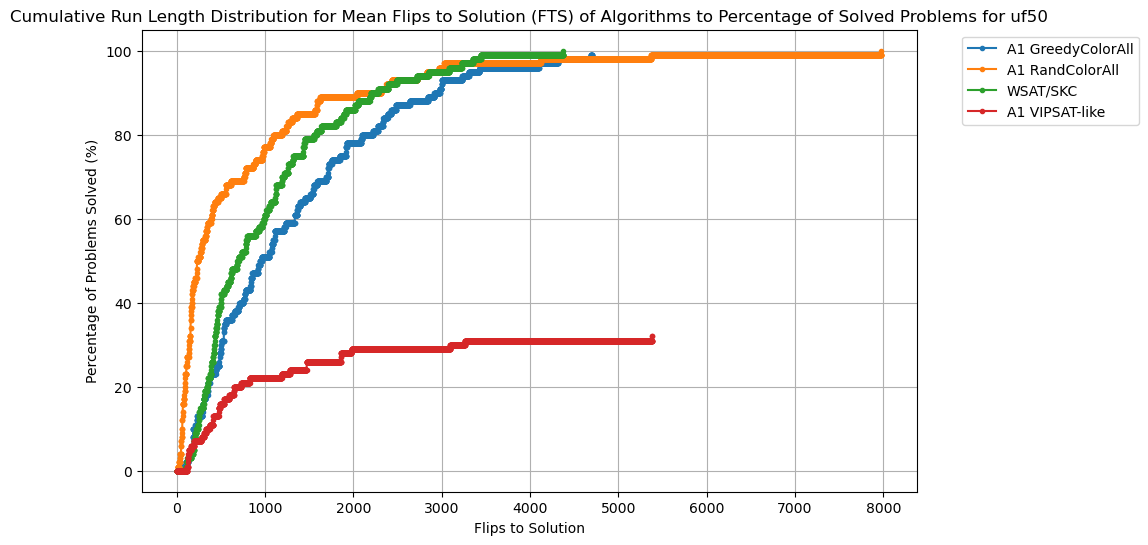

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Note: for these plots, rerun everything above before plotting again with
# a new percentage increase
percentage_increase = 0
imaginary_speedup = 1/(1 + percentage_increase)
cumulative_df['Max Flips'] *= imaginary_speedup
cumulative_df2['Max Flips'] *= imaginary_speedup
cumulative_df4['Max Flips'] *= imaginary_speedup

plt.figure(figsize=(10, 6))
plt.plot(cumulative_df['Max Flips'], cumulative_df['Cumulative Percentage Solved'], marker='.', linestyle='-', label = "A1 GreedyColorAll")
plt.plot(cumulative_df2['Max Flips'], cumulative_df2['Cumulative Percentage Solved'], marker='.', linestyle='-', label = "A1 RandColorAll")
plt.plot(cumulative_df3['Max Flips'], cumulative_df3['Cumulative Percentage Solved'], marker='.', linestyle='-', label = "WSAT/SKC")
plt.plot(cumulative_df4['Max Flips'], cumulative_df4['Cumulative Percentage Solved'], marker='.', linestyle='-', label = "A1 VIPSAT-like")
#plt.xscale('log')
plt.title('Cumulative Run Length Distribution for Mean Flips to Solution (FTS) of Algorithms to Percentage of Solved Problems for uf50')
plt.xlabel('Flips to Solution')
plt.ylabel('Percentage of Problems Solved (%)')
plt.grid(True)



# max_power = int(np.ceil(np.log10(cumulative_df3['Max Flips'].max()))) # power of 10 ticks
# powers = [10**i for i in range(max_power + 1)]
# plt.xticks(powers, [f'$10^{i}$' for i in range(max_power + 1)])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# For Walksat, need to weight max_iter == 200
# for a1, max_iter weighted by 100

<>:41: SyntaxWarning: invalid escape sequence '\%'
<>:41: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_3835900/1681403728.py:41: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel('Percentage of Problems Solved (\%)')


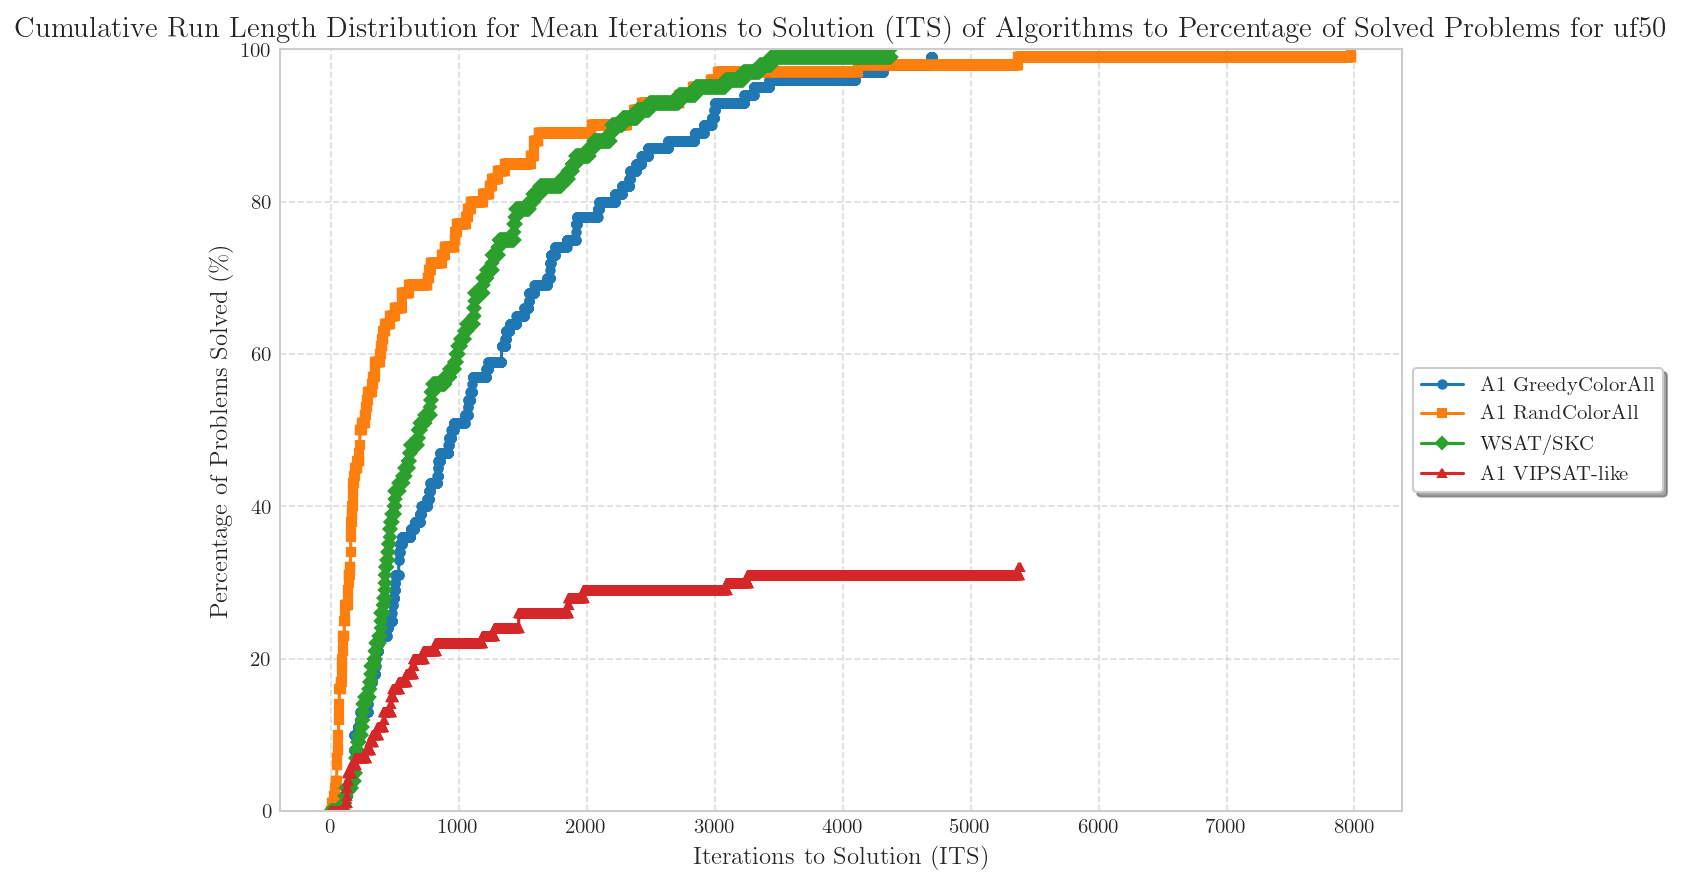

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']
mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10

def plot_algorithm_performance(cumulative_dfs, labels, speed_adjustment=0):
    # Apply speed adjustment if specified
    imaginary_speedup = 1/(1 + speed_adjustment)
    
    # Create adjusted copies of the DataFrames to avoid modifying originals
    adjusted_dfs = []
    for df in cumulative_dfs:
        df_copy = df.copy()
        if speed_adjustment > 0:
            df_copy['Max Flips'] *= imaginary_speedup
        adjusted_dfs.append(df_copy)
    
    # Create plot with consistent aesthetics
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
    
    # Plot each algorithm with distinct colors and markers
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    markers = ['o', 's', 'D', '^']
    
    for i, (df, label) in enumerate(zip(adjusted_dfs, labels)):
        ax.plot(df['Max Flips'], df['Cumulative Percentage Solved'], 
                marker=markers[i], markersize=4, linestyle='-', linewidth=1.5,
                label=label, color=colors[i])
    
    # Configure axes
    ax.set_xlabel('Iterations to Solution (ITS)')
    ax.set_ylabel('Percentage of Problems Solved (\%)')
    
    #x.set_xscale('log')
    # max_power = int(np.ceil(np.log10(adjusted_dfs[2]['Max Flips'].max())))
    # ticks = [10**i for i in range(max_power + 1)]
    # ax.set_xticks(ticks)
    # ax.set_xticklabels([f'$10^{i}$' for i in range(max_power + 1)])
    
    ax.set_title('Cumulative Run Length Distribution for Mean Iterations to Solution (ITS) of Algorithms to Percentage of Solved Problems for uf50')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(frameon=True, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylim(0, 100)
    fig.tight_layout()
    
    return fig

algo_dfs = [cumulative_df, cumulative_df2, cumulative_df3, cumulative_df4]
algo_labels = ["A1 GreedyColorAll", "A1 RandColorAll", "WSAT/SKC", "A1 VIPSAT-like"]
percentage_increase = 0 

fig = plot_algorithm_performance(algo_dfs, algo_labels, percentage_increase)
plt.savefig('algorithm_performance_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Note:
# - For Walksat, max_iter == 200
# - For A1, max_iter weighted by 100

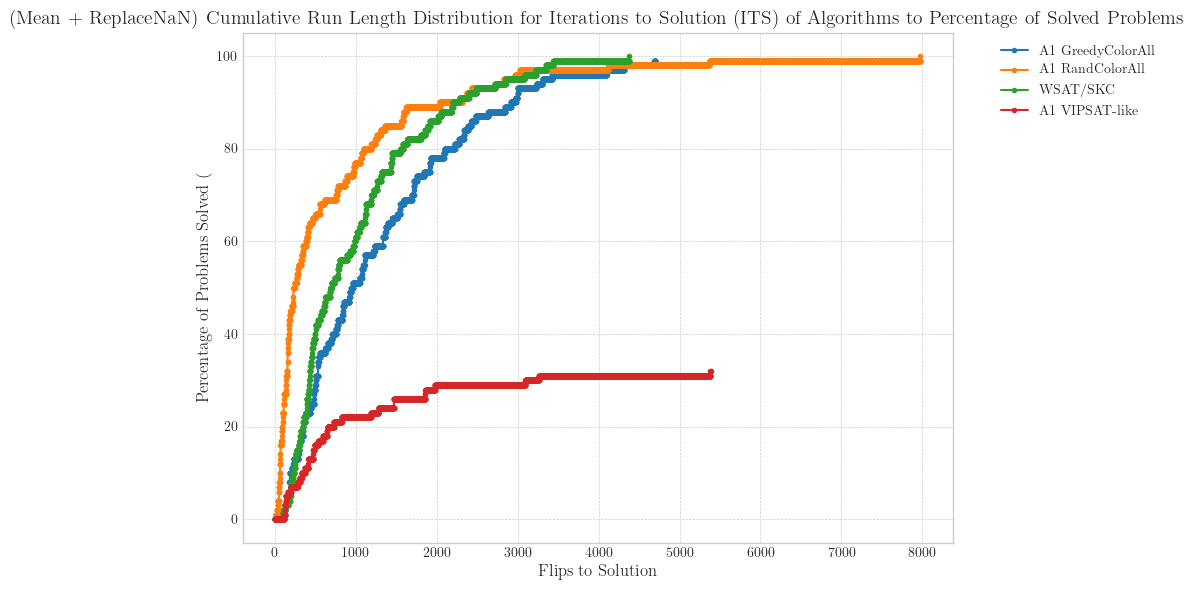

In [16]:
# Ensure all Max Flips values are >= 1 (add a small constant if necessary)
cumulative_df['Max Flips'] = cumulative_df['Max Flips'].clip(lower=1)
cumulative_df2['Max Flips'] = cumulative_df2['Max Flips'].clip(lower=1)
cumulative_df3['Max Flips'] = cumulative_df3['Max Flips'].clip(lower=1)
cumulative_df4['Max Flips'] = cumulative_df4['Max Flips'].clip(lower=1)

# Plot cumulative distributions
plt.figure(figsize=(10, 6))
plt.plot(cumulative_df['Max Flips'], cumulative_df['Cumulative Percentage Solved'], marker='.', linestyle='-', label="A1 GreedyColorAll")
plt.plot(cumulative_df2['Max Flips'], cumulative_df2['Cumulative Percentage Solved'], marker='.', linestyle='-', label="A1 RandColorAll")
plt.plot(cumulative_df3['Max Flips'], cumulative_df3['Cumulative Percentage Solved'], marker='.', linestyle='-', label="WSAT/SKC")
plt.plot(cumulative_df4['Max Flips'], cumulative_df4['Cumulative Percentage Solved'], marker='.', linestyle='-', label="A1 VIPSAT-like")

plt.title('(Mean + ReplaceNaN) Cumulative Run Length Distribution for Iterations to Solution (ITS) of Algorithms to Percentage of Solved Problems')
plt.xlabel('Flips to Solution')
plt.ylabel('Percentage of Problems Solved (%)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
from pathlib import Path

directory = Path('/home/dae/SatExperiments/ColoringWalksatExperiments/uf50suiteSATLIB')

max_flips = int(plotting_first100['min_flips'].max())
flip_range = np.arange(0, max_flips + 1)
cumulative_percentages = []
total_problems = len(plotting_first100)

for flips in flip_range:
    # Number of problems with mean_flips <= current flips
    solved = plotting_first100[plotting_first100['min_flips'] <= flips].shape[0]
    # Calculate percentage
    percentage = (solved / total_problems) * 100
    cumulative_percentages.append(percentage)

# Create a DataFrame for plotting
cumulative_df = pd.DataFrame({
    'Max Flips': flip_range,
    'Cumulative Percentage Solved': cumulative_percentages
})


if not directory.is_dir():
    print(f"The directory '{directory}' does not exist.")
else:
    files = [f for f in directory.iterdir() if f.is_file()]
    num_files = len(files)
    print(f"Number of files in '{directory}': {num_files}")


Number of files in '/home/dae/SatExperiments/ColoringWalksatExperiments/uf50suiteSATLIB': 1001


In [18]:
(10000 - 215) / 10000

0.9785

In [19]:
df['iterations'].isna().sum()
# 215 of the attempts were failures for wsat ? this is 100 tries with 10k maxflips, 100 tries per problem
# compare to 611 attempts which were failures for A1 H0

# success rate would be 10000 - 611 / 10000 = 0.9389 for H0 over first 100 uf50 for 100 tries
# vs. success rate of 0.9785 for WalkSAT

611

In [20]:
success_rate_wsat = 0.9785
success_rate_a10 = 0.9389
success_rate = success_rate_wsat
tts_i = 10000 * (np.log(1-0.99)/np.log(1-success_rate))
print(tts_i)
# this makes no sense, I am assuming this has to be per instance
# am using whole batch numbers ? 

11993.560368985121


In [21]:
df['iterations']

0        284.0
1          NaN
2         43.0
3       1235.0
4         11.0
         ...  
9995     149.0
9996     391.0
9997    3954.0
9998     684.0
9999       NaN
Name: iterations, Length: 10000, dtype: float64

In [22]:
flipsa = df.groupby('problem_name')['flips'].min().reset_index()
flipsa.rename(columns={'flips': 'flipsa'}, inplace=True)

flipsa['problem_number'] = flipsa['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted = flipsa.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips = flipsa_sorted.head(100)

flipsa2 = df2.groupby('problem_name')['flips'].min().reset_index()
flipsa2.rename(columns={'flips': 'flipsa'}, inplace=True)

flipsa2['problem_number'] = flipsa2['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted2= flipsa2.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips2 = flipsa_sorted2.head(100)

flipsa3 = df3.groupby('problem_name')['flips'].min().reset_index()
flipsa3.rename(columns={'flips': 'flipsa'}, inplace=True)

flipsa3['problem_number'] = flipsa3['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted3 = flipsa3.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips3 = flipsa_sorted3.head(100)

flipsa4 = df4.groupby('problem_name')['flips'].min().reset_index()
flipsa4.rename(columns={'flips': 'flipsa'}, inplace=True)

flipsa4['problem_number'] = flipsa4['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted4 = flipsa4.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips4 = flipsa_sorted4.head(100)

In [23]:

headers = ['problem_name', 'time_to_solution', 'noise_param', 'tries', 'iterations', 'flips',
                'order_of_colors', 'order_of_parallel_flips']

chosen = 4

flipsa = df.groupby('problem_name')[headers[chosen]].min().reset_index()
flipsa.rename(columns={headers[chosen]: 'flipsa'}, inplace=True)

flipsa['problem_number'] = flipsa['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted = flipsa.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips = flipsa_sorted.head(100)

flipsa2 = df2.groupby('problem_name')[headers[chosen]].min().reset_index()
flipsa2.rename(columns={headers[chosen]: 'flipsa'}, inplace=True)

flipsa2['problem_number'] = flipsa2['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted2= flipsa2.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips2 = flipsa_sorted2.head(100)

flipsa3 = df3.groupby('problem_name')[headers[chosen]].min().reset_index()
flipsa3.rename(columns={headers[chosen]: 'flipsa'}, inplace=True)

flipsa3['problem_number'] = flipsa3['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted3 = flipsa3.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips3 = flipsa_sorted3.head(100)

flipsa4 = df4.groupby('problem_name')[headers[chosen]].min().reset_index()
flipsa4.rename(columns={headers[chosen]: 'flipsa'}, inplace=True)

flipsa4['problem_number'] = flipsa4['problem_name'].apply(extract_number) #because pandas sorting is doing uf5001 then uf50010 then uf500100
flipsa_sorted4 = flipsa4.sort_values(by='problem_number', ascending=True).reset_index(drop=True) # Sort the df based on 'problem_number' in ascending order
plotting_first100flips4 = flipsa_sorted4.head(100)

[]

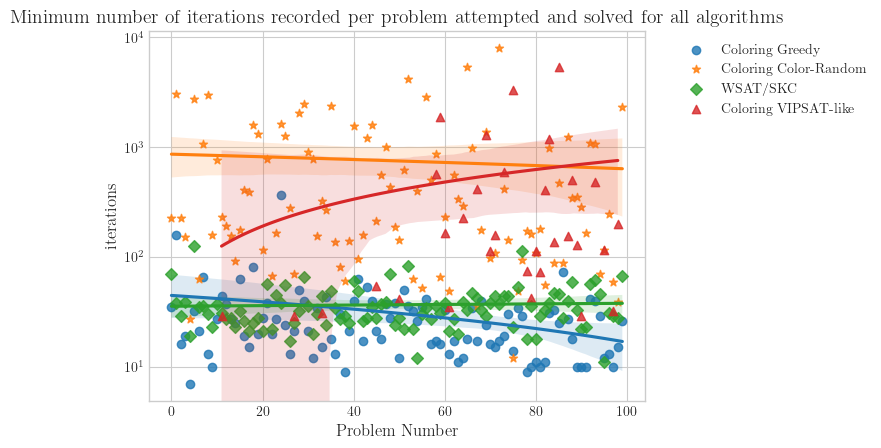

In [24]:
problem_names = df['problem_name']
sns.regplot(x=list(range(100)), y=plotting_first100flips['flipsa'],  label = "Coloring Greedy", order=1)
sns.regplot(x=list(range(100)), y=plotting_first100flips2['flipsa'],  label = "Coloring Color-Random", order=1, marker='*' )
sns.regplot(x=list(range(100)), y=plotting_first100flips3['flipsa'],  label = "WSAT/SKC", order=1, marker="D")
sns.regplot(x=list(range(100)), y=plotting_first100flips4['flipsa'],  label = "Coloring VIPSAT-like", order=1, marker="^")

plt.title('Minimum number of ' + headers[chosen] +' recorded per problem attempted and solved for all algorithms')
plt.xlabel('Problem Number')
plt.ylabel(headers[chosen])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')

plt.plot()

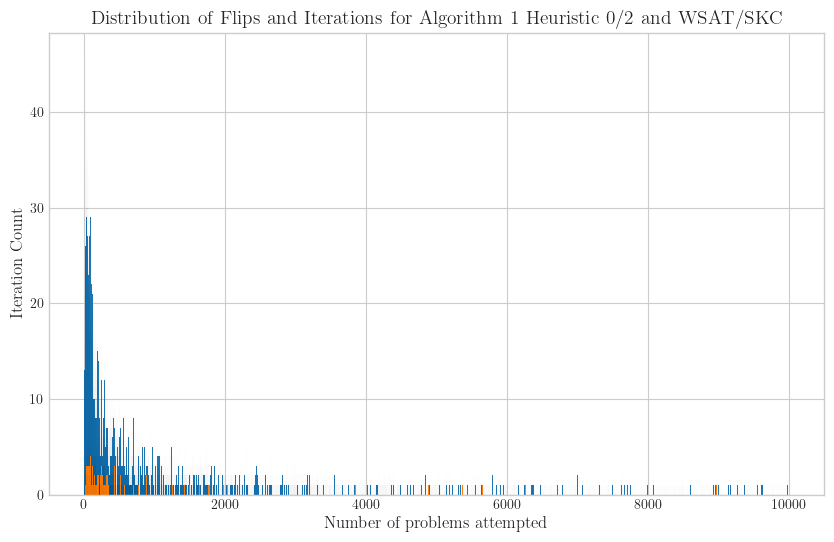

In [25]:

# Study this plot, why the hell?

plt.figure(figsize=(10,6))
sns.histplot(df['iterations'].dropna(), bins=10000, kde=False, label='A1H0 iterations', alpha=1)
plt.title('Distribution of Flips and Iterations for Algorithm 1 Heuristic 0/2 and WSAT/SKC')
plt.xlabel('Number of problems attempted')
plt.ylabel('Iteration Count')

sns.histplot(df2['iterations'].dropna(), bins=10000, kde=False, label='A1H2 iterations', alpha=1)
plt.xlabel('Number of problems attempted')
plt.ylabel('Iteration Count')
plt.show()


# Why 

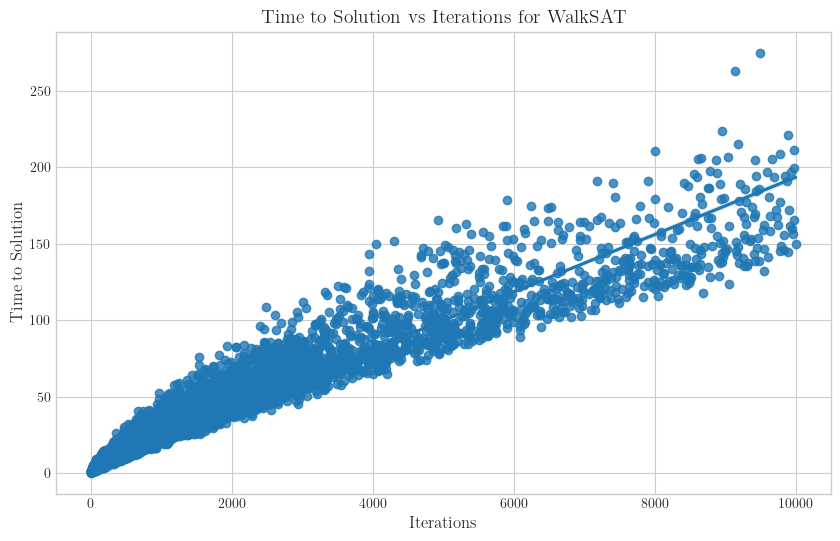

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='iterations', y='time_to_solution',order=1)
plt.title('Time to Solution vs Iterations for WalkSAT')
plt.xlabel('Iterations')
plt.ylabel('Time to Solution')
plt.show()


In [27]:
df['run_id']

0         1
1         1
2         1
3         1
4         1
       ... 
9995    100
9996    100
9997    100
9998    100
9999    100
Name: run_id, Length: 10000, dtype: int64

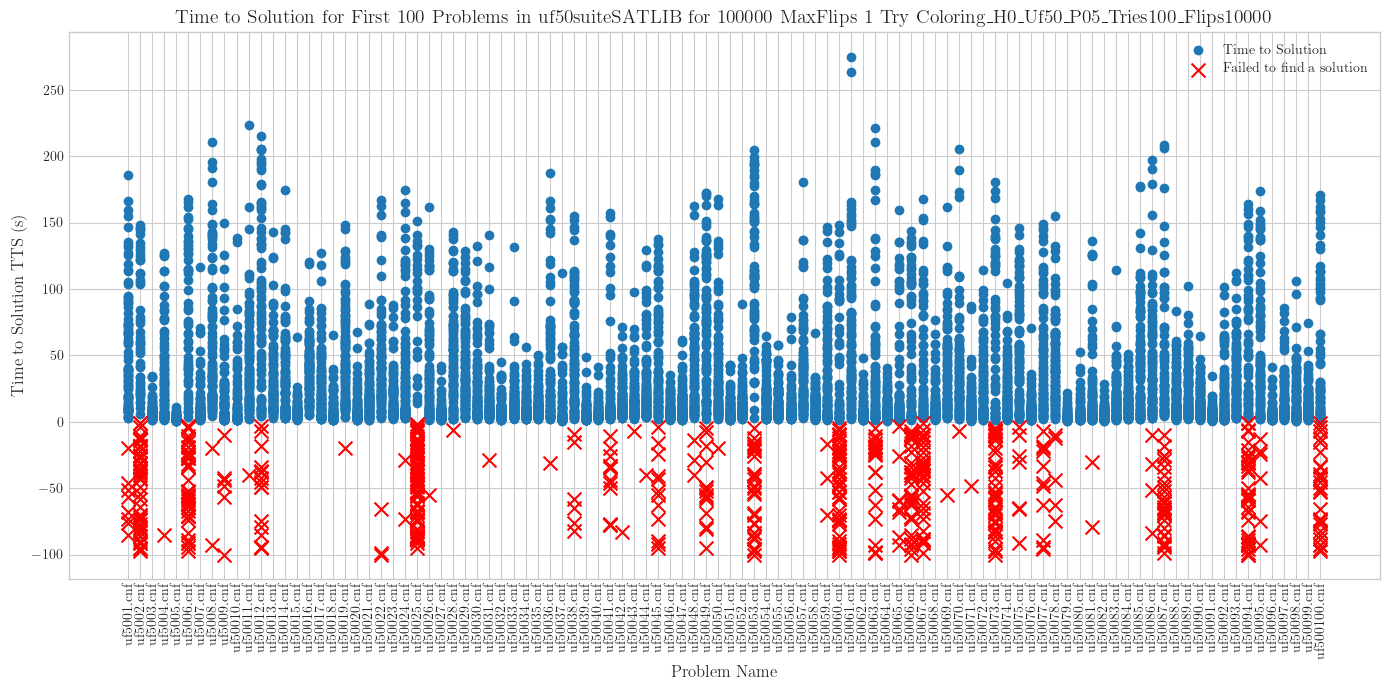

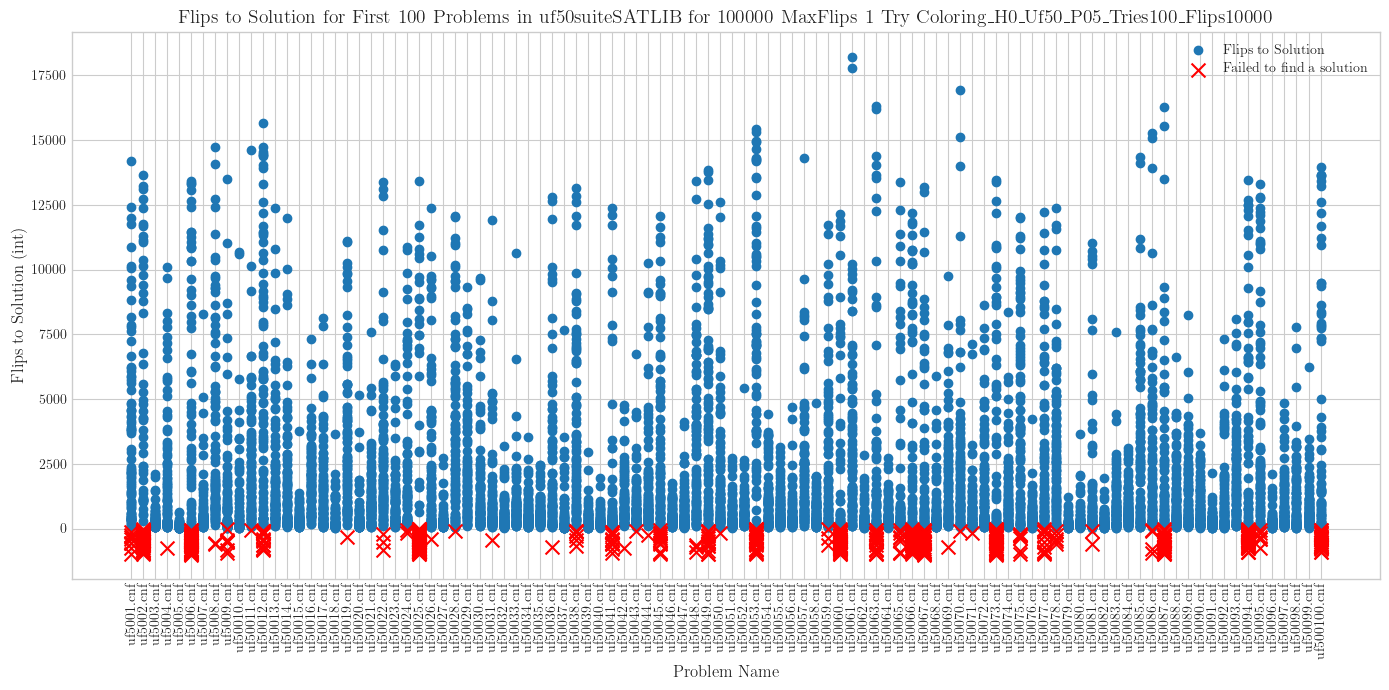

In [28]:

problem_names = df['problem_name']
times_to_solution = df['time_to_solution']
flips_to_solution = df['flips']

plt.figure(figsize=(14, 7))
plt.scatter(problem_names, times_to_solution, label='Time to Solution')
plt.xlabel('Problem Name')
plt.ylabel('Time to Solution TTS (s)')
plt.title('Time to Solution for First 100 Problems in uf50suiteSATLIB for 100000 MaxFlips 1 Try ' + algorithm)
plt.xticks(rotation=90)
plt.grid(True)

failed_indices = np.where(np.isnan(times_to_solution))[0] # if there are any NaN solutions (fails) highlight them
if failed_indices.size > 0:
    plt.scatter(np.array(problem_names)[failed_indices], 
                np.random.randint(-100, 0, size=np.shape(failed_indices)), 
                color='red', marker='x', s=100, label='Failed to find a solution')

plt.legend()
plt.tight_layout()
plt.show()

# Flips to solution
plt.figure(figsize=(14, 7))
plt.scatter(problem_names, flips_to_solution, marker='o', linestyle='-', label='Flips to Solution')
plt.xlabel('Problem Name')
plt.ylabel('Flips to Solution (int)')
plt.title('Flips to Solution for First 100 Problems in uf50suiteSATLIB for 100000 MaxFlips 1 Try ' + algorithm)
plt.xticks(rotation=90)
plt.grid(True)

if failed_indices.size > 0: # if there are any NaN solutions (fails) highlight them
    plt.scatter(np.array(problem_names)[failed_indices], 
                np.random.randint(-1000, 0, size=np.shape(failed_indices)),
                color='red', marker='x', s=100,label='Failed to find a solution')

plt.legend()
plt.tight_layout()
plt.show()

In [29]:
import ast 

def parse_list_column(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return []

# Apply the function to the 'order_of_colors' column
df['order_of_colors'] = df['order_of_colors'].apply(parse_list_column)


In [30]:
df['tries']

0       0.0
1       NaN
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    NaN
Name: tries, Length: 10000, dtype: float64

In [31]:
df['success_rate'] = df['tries']/100

In [32]:
print(df['success_rate'])


0       0.0
1       NaN
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    NaN
Name: success_rate, Length: 10000, dtype: float64


In [33]:
from collections import Counter

# Flatten all color values into a single list
all_colors = [color for sublist in df['order_of_colors'] for color in sublist]

# Count frequency of each color
color_counts = Counter(all_colors)

# Convert to DataFrame for plotting
color_counts_df = pd.DataFrame.from_dict(color_counts, orient='index', columns=['count'])
color_counts_df.index.name = 'color'
color_counts_df.reset_index(inplace=True)

print(color_counts_df)

    color    count
0       4  1252743
1       7  1077857
2       6  1130000
3       0  1288960
4       5  1082530
5       1  1271734
6       2  1289921
7       8   877521
8       3  1307180
9      10    90877
10      9   397546
11     11     9809


In [34]:
df['order_of_colors']

0       [4, 7, 6, 6, 7, 0, 5, 1, 1, 1, 0, 2, 2, 0, 7, ...
1                                                      []
2       [0, 7, 5, 1, 3, 2, 6, 1, 4, 2, 6, 10, 5, 3, 5,...
3       [4, 8, 5, 3, 3, 1, 4, 1, 4, 4, 7, 1, 2, 9, 3, ...
4                       [3, 5, 4, 1, 0, 8, 3, 7, 4, 7, 8]
                              ...                        
9995    [0, 5, 5, 8, 2, 1, 4, 7, 5, 0, 3, 4, 8, 4, 8, ...
9996    [7, 3, 4, 6, 4, 5, 0, 4, 3, 8, 0, 0, 3, 8, 4, ...
9997    [1, 0, 4, 2, 7, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, ...
9998    [0, 5, 6, 5, 6, 4, 5, 4, 1, 6, 4, 1, 2, 4, 6, ...
9999                                                   []
Name: order_of_colors, Length: 10000, dtype: object

    count  from_color  to_color
0   82585           4         7
1   64922           7         6
2  485960           6         6
3   64690           6         7
4   82481           7         0


KeyboardInterrupt: 

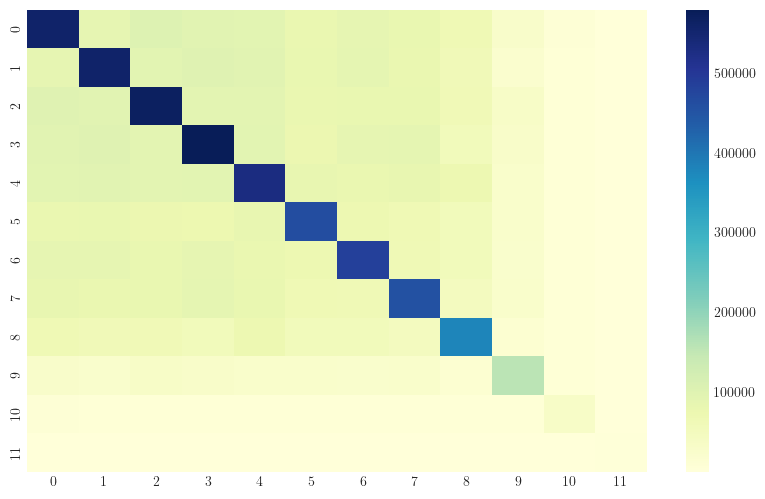

In [35]:
# Function to extract transitions
n_frame = 1
def get_transitions(color_list):
    return list(zip(color_list[:-n_frame], color_list[n_frame:]))

# Get all transitions
all_transitions = [transition for sublist in df['order_of_colors'] for transition in get_transitions(sublist)]

# Count frequency of each transition
transition_counts = Counter(all_transitions)

# Convert to DataFrame for plotting
transition_counts_df = pd.DataFrame(
    list(transition_counts.items()),
    columns=['transition', 'count']
)

# Split the transition tuple into separate columns
transition_counts_df[['from_color', 'to_color']] = pd.DataFrame(transition_counts_df['transition'].tolist(), index=transition_counts_df.index)
transition_counts_df.drop('transition', axis=1, inplace=True)

print(transition_counts_df.head())

# Pivot the transition counts into a matrix
transition_pivot = transition_counts_df.pivot(index='from_color', columns='to_color', values='count').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(transition_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Color Transitions')
plt.xlabel('To Color')
plt.ylabel('From Color')
plt.tight_layout()
plt.show()



In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import Counter
# import seaborn as sns

# # Function to extract all transitions in a single list
# def get_transitions(color_list):
#     return list(zip(color_list[:-1], color_list[1:]))

# # Flatten all transitions from the order_of_colors column
# all_transitions = [transition for sublist in df4['order_of_colors'] for transition in get_transitions(sublist)]

# # Count frequency of each transition
# transition_counts = Counter(all_transitions)

# # Get all unique colors
# unique_colors = sorted(set([color for sublist in df4['order_of_colors'] for color in sublist]))

# # Initialize a transition matrix
# transition_matrix = pd.DataFrame(
#     np.zeros((len(unique_colors), len(unique_colors)), dtype=int),
#     index=unique_colors,
#     columns=unique_colors
# )

# # Populate the transition matrix with counts
# for (from_color, to_color), count in transition_counts.items():
#     transition_matrix.loc[from_color, to_color] = count

# # Plot heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(transition_matrix, annot=True, fmt="d", cmap="Blues")
# plt.title("Transition Heatmap")
# plt.xlabel("To Color")
# plt.ylabel("From Color")
# plt.show()


/tmp/ipykernel_3538058/212592232.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='first_color', y='flips', errorbar='sd', palette='magma')


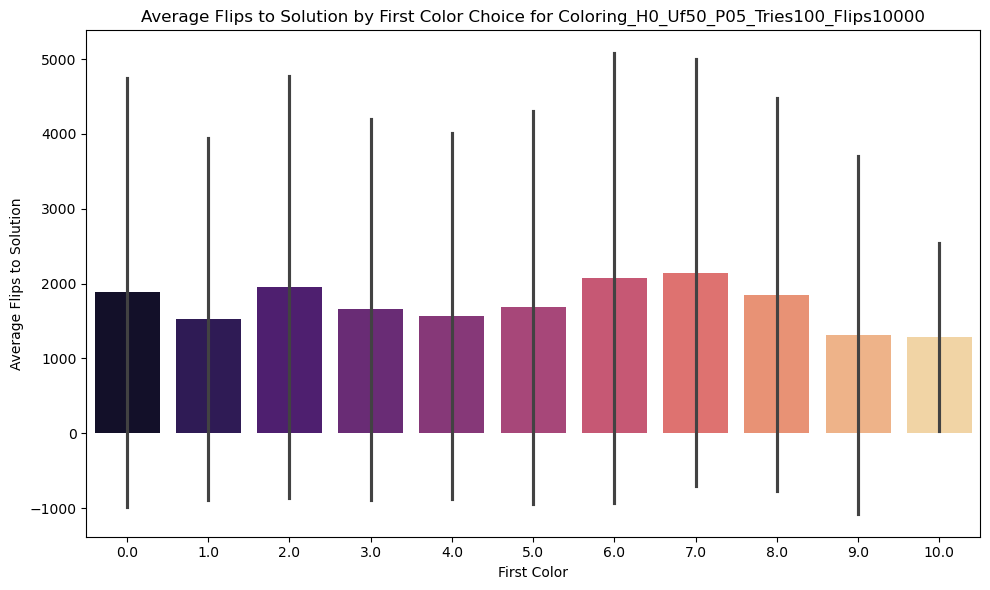

In [ ]:
# QQ Check this!
df['first_color'] = df['order_of_colors'].apply(lambda x: x[0] if len(x) > 0 else None)

# Remove entries where first_color is None
filtered_df = df.dropna(subset=['first_color'])

plt.figure(figsize=(10,6))
sns.barplot(data=filtered_df, x='first_color', y='flips', errorbar='sd', palette='magma')
plt.title('Average Flips to Solution by First Color Choice for '+algorithm)
plt.xlabel('First Color')
plt.ylabel('Average Flips to Solution')
plt.tight_layout()
plt.show()


/tmp/ipykernel_3538058/2744670706.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_counts_df, x='color', y='count', palette='deep')


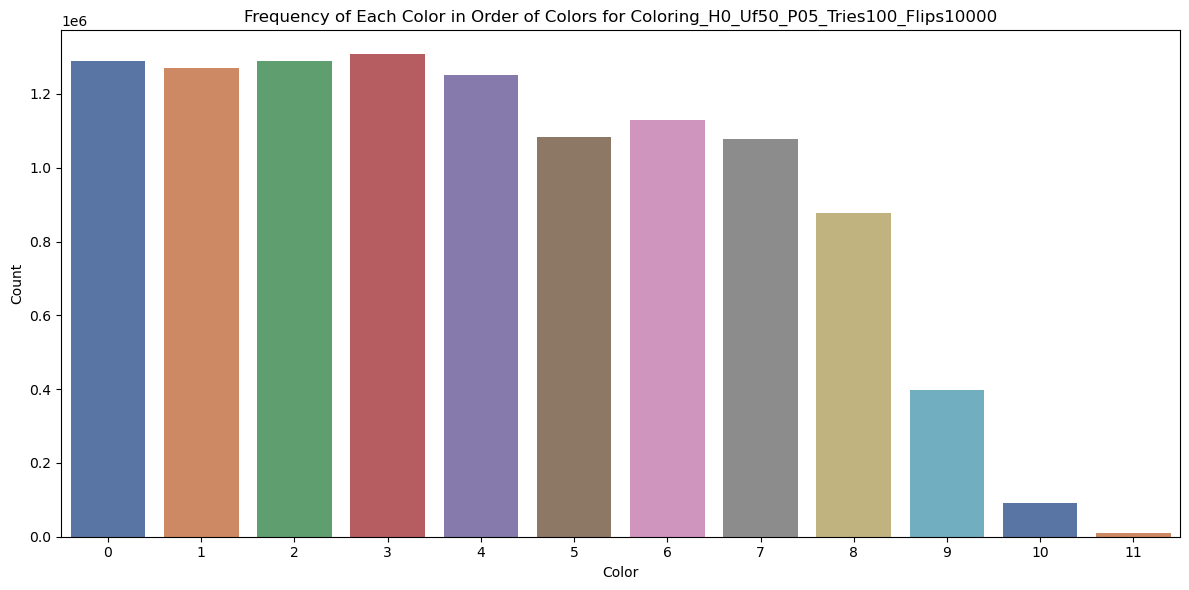

In [ ]:
from collections import Counter

# Flatten all colors into a single list
all_colors = [color for sublist in df['order_of_colors'] for color in sublist]
color_counts = Counter(all_colors)
color_counts_df = pd.DataFrame.from_dict(color_counts, orient='index', columns=['count']).reset_index().rename(columns={'index': 'color'})
# Sort colors by frequency
color_counts_df = color_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=color_counts_df, x='color', y='count', palette='deep')
plt.title('Frequency of Each Color in Order of Colors for '+algorithm)
plt.xlabel('Color')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Expand the order_of_colors into rows with iteration numbers
expanded_data = []
for idx, row in df.iterrows():
    if pd.notna(row['order_of_colors']):
        colors = row['order_of_colors']
        for iteration, color in enumerate(colors):
            expanded_data.append({'iteration': iteration, 'color': color, 'run_id': row['run_id']})

# Create a new DataFrame for plotting
plot_df = pd.DataFrame(expanded_data)

# Plot
plt.figure(figsize=(12, 8))
for color in sorted(plot_df['color'].unique()):
    subset = plot_df[plot_df['color'] == color]
    plt.scatter(subset['iteration'], subset['color'], label=f'Color {color}', s=10, alpha=0.7)

plt.xlabel("Iteration Number")
plt.ylabel("Chosen Color")
plt.title("Color Choices Over Iterations")
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.legend(title="Y-axis Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()